# **LAB 9 - Gale-Shapley and Irving Algorithms**

Juan Esteban Alarcón Bravo
$$ $$

---

In [1]:
import random as r
import statistics as s
import matplotlib.pyplot as plt

In [2]:
def createPreference(n):
  prefMatrix = []
  for i in range(1, 2*n+1):
    prefValues = []
    while (len(prefValues) < n):
      k = r.randint(1, n)
      if k in prefValues:
        continue
      prefValues.append(k)
    prefMatrix.append(prefValues)
  return prefMatrix

In [3]:
steps = 0

In [4]:
def galeShapley (n,rep=100):

  # Python3 program for stable marriage problem 

  # This function returns true if woman 'w' prefers man 'm1' over man 'm' 
  def wPrefersM1OverM(prefMatrix, w, m, m1): 	
    for i in range(n):
      if (prefMatrix[w][i] == m1): 
        return True

      # If m cmes before m1 in w's list, then free her current engagement and engage her with m 
      if (prefMatrix[w][i] == m): 
        return False

  # Prints stable matching for n boys and n girls. Boys are numbered as 0 to n-1. Girls are numbereed as n to 2n-1. 
  def stableMarriage(prefMatrix):
    wPartner = [-1 for i in range(n)]
    steps = 0

    # An array to store availability of men. If mFree[i] is false, then man 'i' is free, otherwise engaged. 
    mFree = [False for i in range(n)] 

    freeCount = n 

    # While there are free men 
    while (freeCount > 0): 
      
      # Pick the first free man (we could pick any) 
      m = 0
      while (m < n): 
        if (mFree[m] == False): 
          break
        m += 1

      # One by one go to all women according to m's preferences. Here m is the picked free man 
      i = 0
      while i < n and mFree[m] == False:
        w = prefMatrix[m][i] 

        # The woman of preference is free, w and m become partners (Note that the partnership maybe changed later). So we can say they are engaged not married 
        if (wPartner[w - n] == -1): 
          wPartner[w - n] = m 
          mFree[m] = True
          freeCount -= 1
          steps += 1

        else: 
          
          # If w is not free, find current engagement of w 
          m1 = wPartner[w - n] 

          steps += 1
          # If w prefers m over her current engagement m1, then break the engagement between w and m1 and engage m with w. 
          if (wPrefersM1OverM(prefMatrix, w, m, m1) == False):
            wPartner[w - n] = m 
            mFree[m] = True
            mFree[m1] = False
        i += 1

        # End of Else End of the for loop that goes to all women in m's list End of main while loop 

    return steps

  # Driver Code

  #print(prefMatrix)
  steps = []
  for i in range(rep):
    prefMatrix = createPreference(n)
    steps.append(stableMarriage(prefMatrix))

  stepsCounter = []
  for i in range(n, n**2 + 1):
    stepsCounter.append(steps.count(i))

  k = len(stepsCounter) - 1
  while k >= 0:
    if stepsCounter[k] == 0:
      stepsCounter.pop(k)
    k -= 1

  steps = list(set(steps))

  print("Corriendo el algoritmo {0} veces para n = {1}\n".format(rep,n))
  chart = plt.bar(steps,stepsCounter,align='center',alpha=0.75, color="red")
  plt.show()
  print('Máximo =', max(steps),'\tMínimo =', min(steps))
  print('Media =', s.mean(steps))



  # This code is contributed by Mohit Kumar


## $n = 4$

Corriendo el algoritmo 100 veces para n = 4



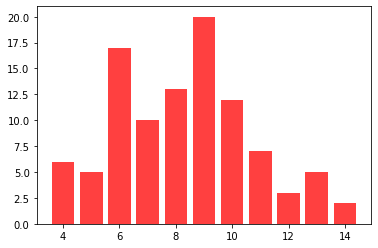

Máximo = 14 	Mínimo = 4
Media = 9


In [5]:
galeShapley(n=4)

## $n = 40$

Corriendo el algoritmo 100 veces para n = 40



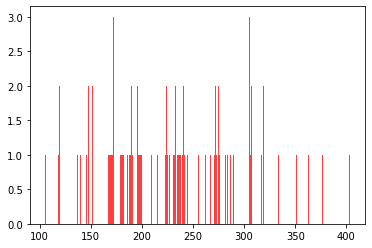

Máximo = 403 	Mínimo = 106
Media = 229.0487804878049


In [6]:
galeShapley(n=40)